In [1]:
#import necessary libraries for manipulation and analysis
import numpy as np  
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [2]:
#import dataset
df = pd.read_csv("C:/Users/agbel/OneDrive - Contoso/Desktop/PROJECT/PCOS1/PCOS_extended_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  2000 non-null   int64  
 1   Patient File No.        2000 non-null   int64  
 2   PCOS (Y/N)              2000 non-null   int64  
 3    Age (yrs)              2000 non-null   int64  
 4   Weight (Kg)             2000 non-null   float64
 5   Height(Cm)              2000 non-null   float64
 6   BMI                     2000 non-null   float64
 7   Blood Group             2000 non-null   int64  
 8   Pulse rate(bpm)         2000 non-null   int64  
 9   RR (breaths/min)        2000 non-null   int64  
 10  Hb(g/dl)                2000 non-null   float64
 11  Cycle(R/I)              2000 non-null   int64  
 12  Cycle length(days)      2000 non-null   int64  
 13  Marraige Status (Yrs)   1997 non-null   float64
 14  Pregnant(Y/N)           2000 non-null   

In [4]:
print (df.head())

   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0     193               193           0          30    69.979147   167.708055   
1     360               360           0          36    63.711688   154.055877   
2      10                10           0          36    51.848631   149.059804   
3     278               278           1          29    66.893988   148.628036   
4      71                71           0          33    52.536198   150.767409   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  23.185569           12                72                22  ...   
1  25.441392           13                70                18  ...   
2  23.928264           15                80                20  ...   
3  27.894935           15                72                18  ...   
4  23.079564           13                72                18  ...   

   Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0             1 

In [53]:
#to see the distribution of PCOS and Non_PCOS cases in the dataset
pcos_data = df[df['PCOS (Y/N)'] == 1]  # PCOS cases (1)
non_pcos_data = df[df['PCOS (Y/N)'] == 0]  # Non-PCOS cases (0)

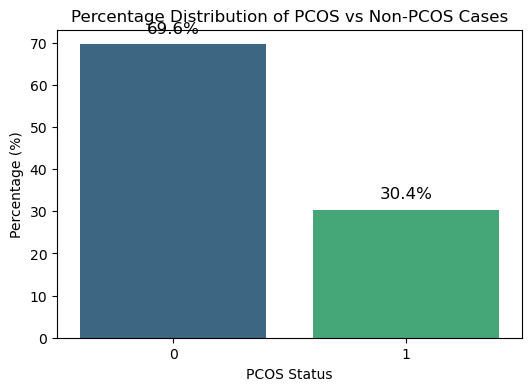

In [58]:
#VISUALIZE THE DISTRIBUTION
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of PCOS and Non-PCOS cases
pcos_counts = df['PCOS (Y/N)'].value_counts()

# Calculate the percentage distribution
pcos_percentage = (pcos_counts / len(df)) * 100

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=pcos_percentage.index, y=pcos_percentage.values, palette='viridis')

# Add percentage labels on top of the bars
for i, value in enumerate(pcos_percentage.values):
    plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', fontsize=12)

# Set plot labels and title
plt.xlabel('PCOS Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of PCOS vs Non-PCOS Cases')

# Display the plot
plt.show()

C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


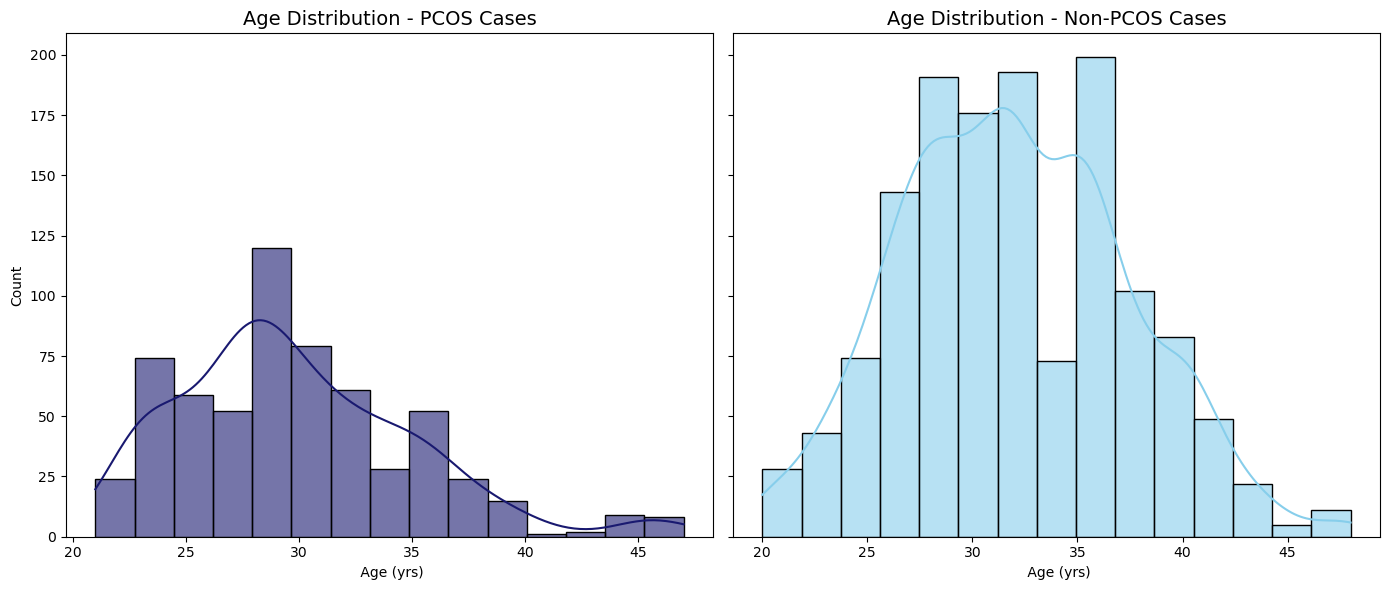

In [74]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# PCOS Cases
sns.histplot(pcos_data[" Age (yrs)"], bins=15, kde=True, color='midnightblue', alpha=0.6, ax=axes[0])
axes[0].set_title("Age Distribution - PCOS Cases", fontsize=14)
axes[0].set_xlabel(" Age (yrs)")
axes[0].set_ylabel("Count")

# Non-PCOS Cases
sns.histplot(non_pcos_data[" Age (yrs)"], bins=15, kde=True, color='skyblue', alpha=0.6, ax=axes[1])
axes[1].set_title("Age Distribution - Non-PCOS Cases", fontsize=14)
axes[1].set_xlabel(" Age (yrs)")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


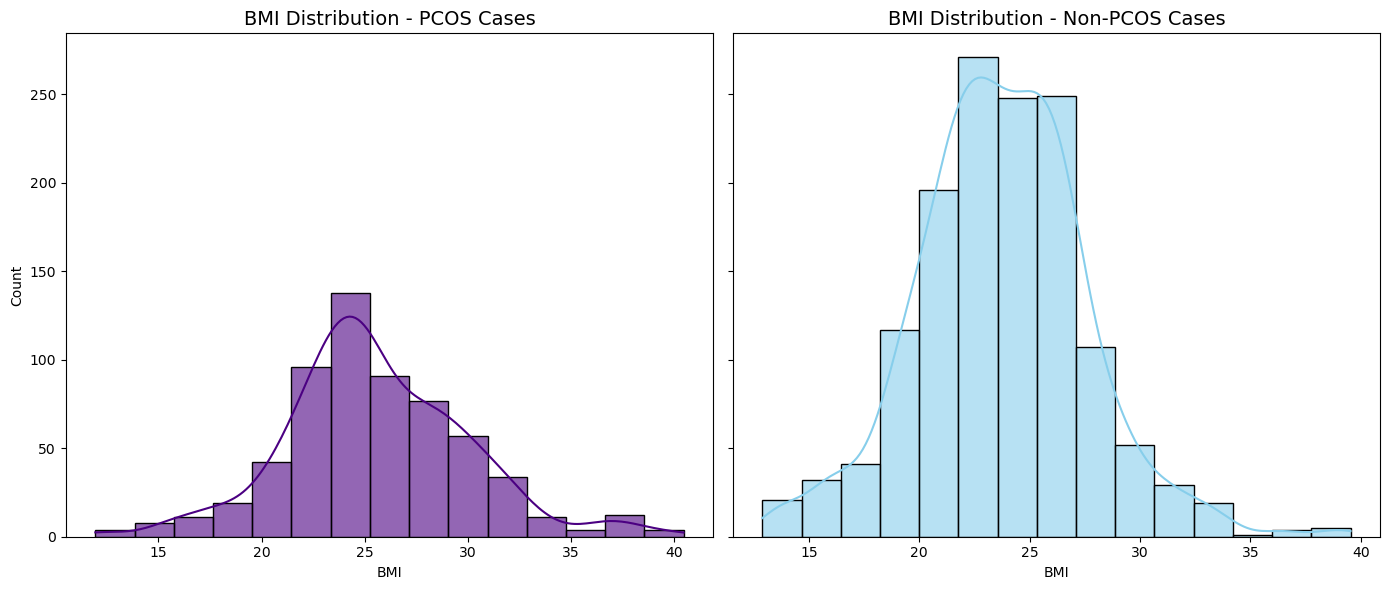

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# PCOS Cases
sns.histplot(pcos_data["BMI"], bins=15, kde=True, color='indigo', alpha=0.6, ax=axes[0])
axes[0].set_title("BMI Distribution - PCOS Cases", fontsize=14)
axes[0].set_xlabel("BMI")
axes[0].set_ylabel("Count")

# Non-PCOS Cases
sns.histplot(non_pcos_data["BMI"], bins=15, kde=True, color='skyblue', alpha=0.6, ax=axes[1])
axes[1].set_title("BMI Distribution - Non-PCOS Cases", fontsize=14)
axes[1].set_xlabel("BMI")
axes[1].set_ylabel("Count")

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
# Drop multiple columns
df = df.drop(columns=['Sl. No', 'Patient File No.', 'Marraige Status (Yrs)'])

print(df)

      PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  \
0              0          30    69.979147   167.708055  23.185569   
1              0          36    63.711688   154.055877  25.441392   
2              0          36    51.848631   149.059804  23.928264   
3              1          29    66.893988   148.628036  27.894935   
4              0          33    52.536198   150.767409  23.079564   
...          ...         ...          ...          ...        ...   
1995           0          31    66.948922   155.976858  26.662263   
1996           0          37    64.592788   151.979792  27.681715   
1997           0          32    47.750129   148.596447  20.041406   
1998           0          40    31.869660   152.589988  13.793101   
1999           1          22    70.206568   167.852724  24.791898   

      Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0              12                72                22      12.0           4   
1            

In [6]:
# Count missing values per column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Show only columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0]
print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [7]:
# To see statistical summary
df.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.304000,31.35400,59.527068,156.416496,24.284184,13.788000,73.241000,19.232000,11.153785,2.535500,...,0.477000,0.517000,0.257500,114.701590,76.989127,6.09000,6.50350,14.879300,15.410320,8.571637
std,0.460098,5.44982,11.445212,6.044243,4.132187,1.832958,4.098941,1.740601,0.868073,0.888332,...,0.499596,0.499836,0.437366,7.564600,6.085313,4.23094,4.37362,3.641161,3.270965,2.217999
min,0.000000,20.00000,30.739215,136.539081,11.939138,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,11.525778,7.680842,0.00000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,28.00000,52.248684,152.169130,21.765743,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,109.564746,72.433707,3.00000,3.00000,13.000000,13.000000,7.099641
50%,0.000000,31.00000,58.538632,156.433674,24.188981,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,114.558163,78.340745,5.00000,6.00000,15.000000,16.000000,8.434753
75%,1.000000,35.00000,65.519518,160.064790,26.600461,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,1.000000,120.190386,81.186301,8.25000,9.00000,18.000000,18.000000,9.876932
max,1.000000,48.00000,113.379053,180.388539,40.449415,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,144.980616,104.267012,22.00000,20.00000,24.000000,24.000000,18.675452


In [43]:
# Create a copy for use later
df2 = df.copy()

In [9]:
#VISUALIZATIONS
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

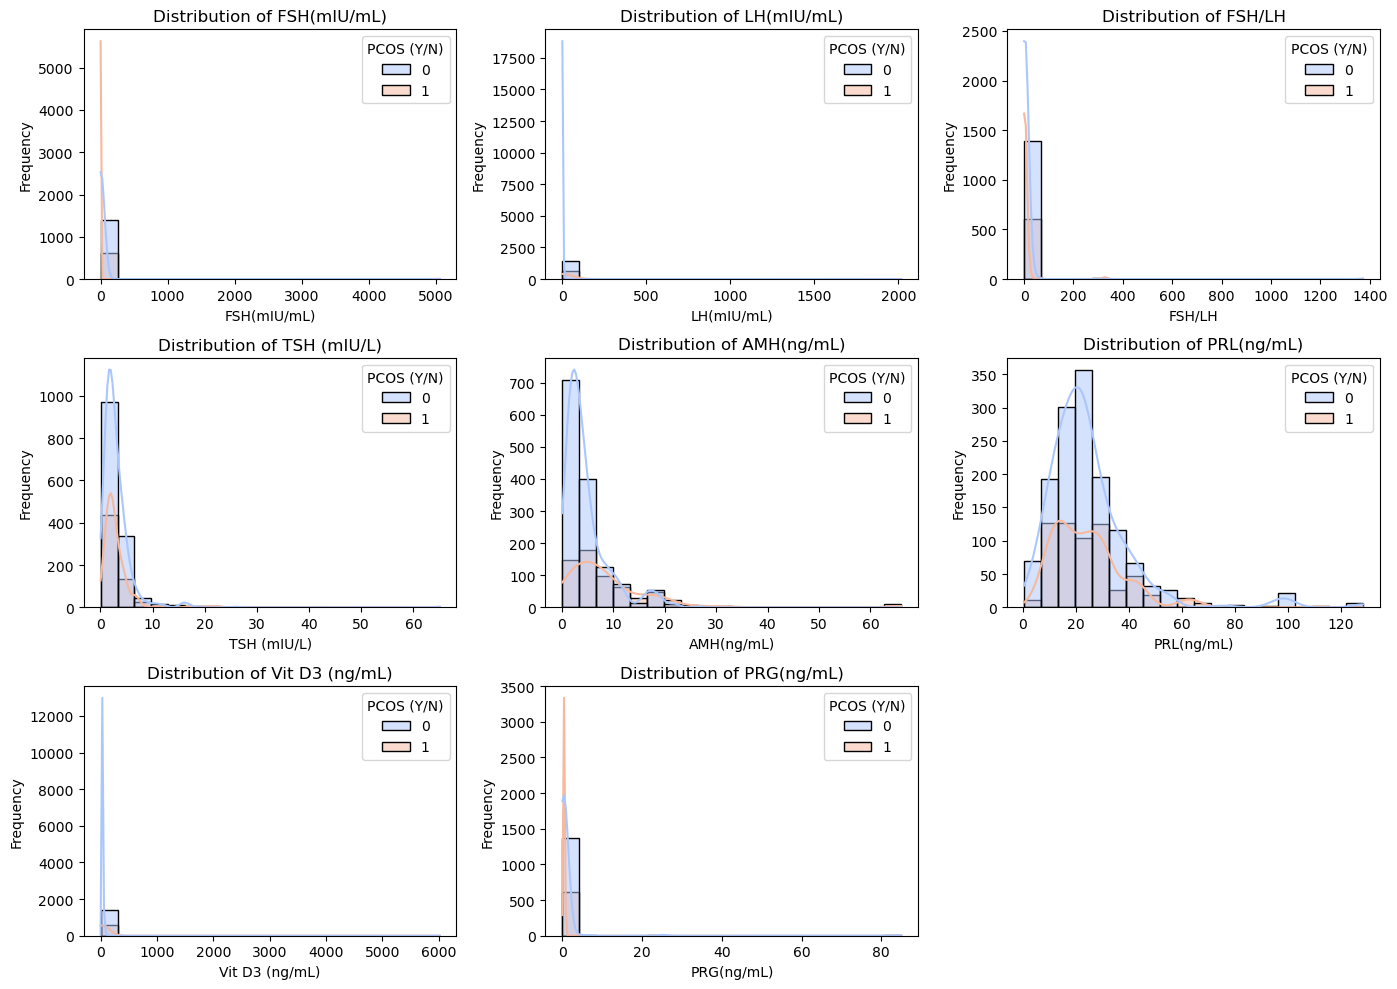

In [10]:
#visualize for hormonal factors
# Convert PCOS column to string for categorical analysis
df['PCOS (Y/N)'] = df['PCOS (Y/N)'].astype(str)

# Convert numeric columns to float
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define hormonal features
hormonal_features = ['FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 
                     'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)']

# Plot histograms
plt.figure(figsize=(14, 10))
for i, col in enumerate(hormonal_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue="PCOS (Y/N)", kde=True, palette="coolwarm", bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

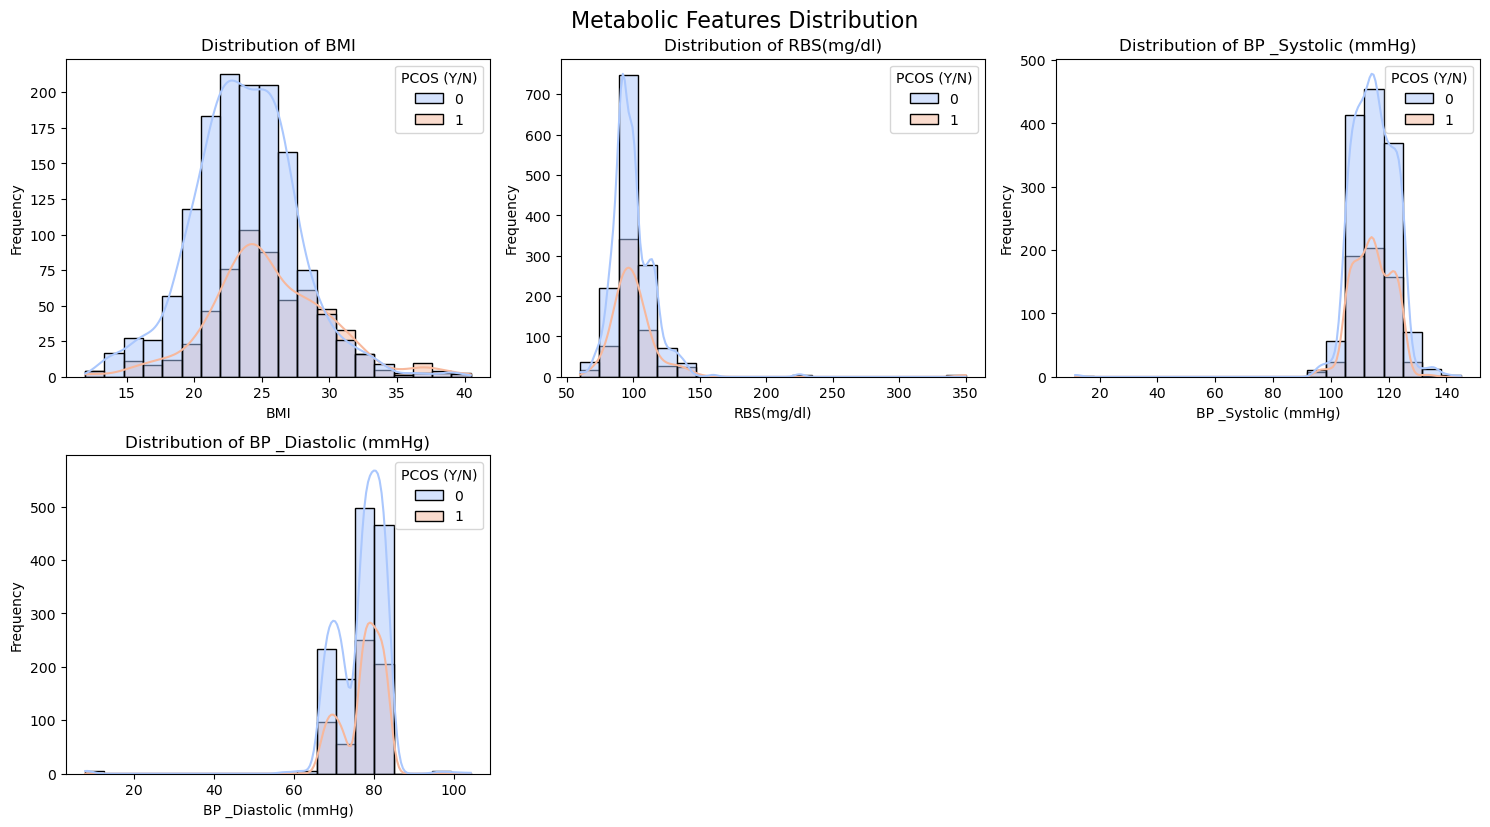

In [11]:
#visualize for metabolic features
# Convert metabolic features to numeric 
metabolic_features = ['BMI', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']
for col in metabolic_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.mean(numeric_only=True), inplace=True)
# Function to plot histograms
def plot_histograms(features, title):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(data=df, x=col, hue="PCOS (Y/N)", kde=True, palette="coolwarm", bins=20, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Hide extra subplots if features < 9
    for j in range(i + 1, 9):
        axes[j].set_visible(False)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()
plot_histograms(metabolic_features, "Metabolic Features Distribution")

C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\agbel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

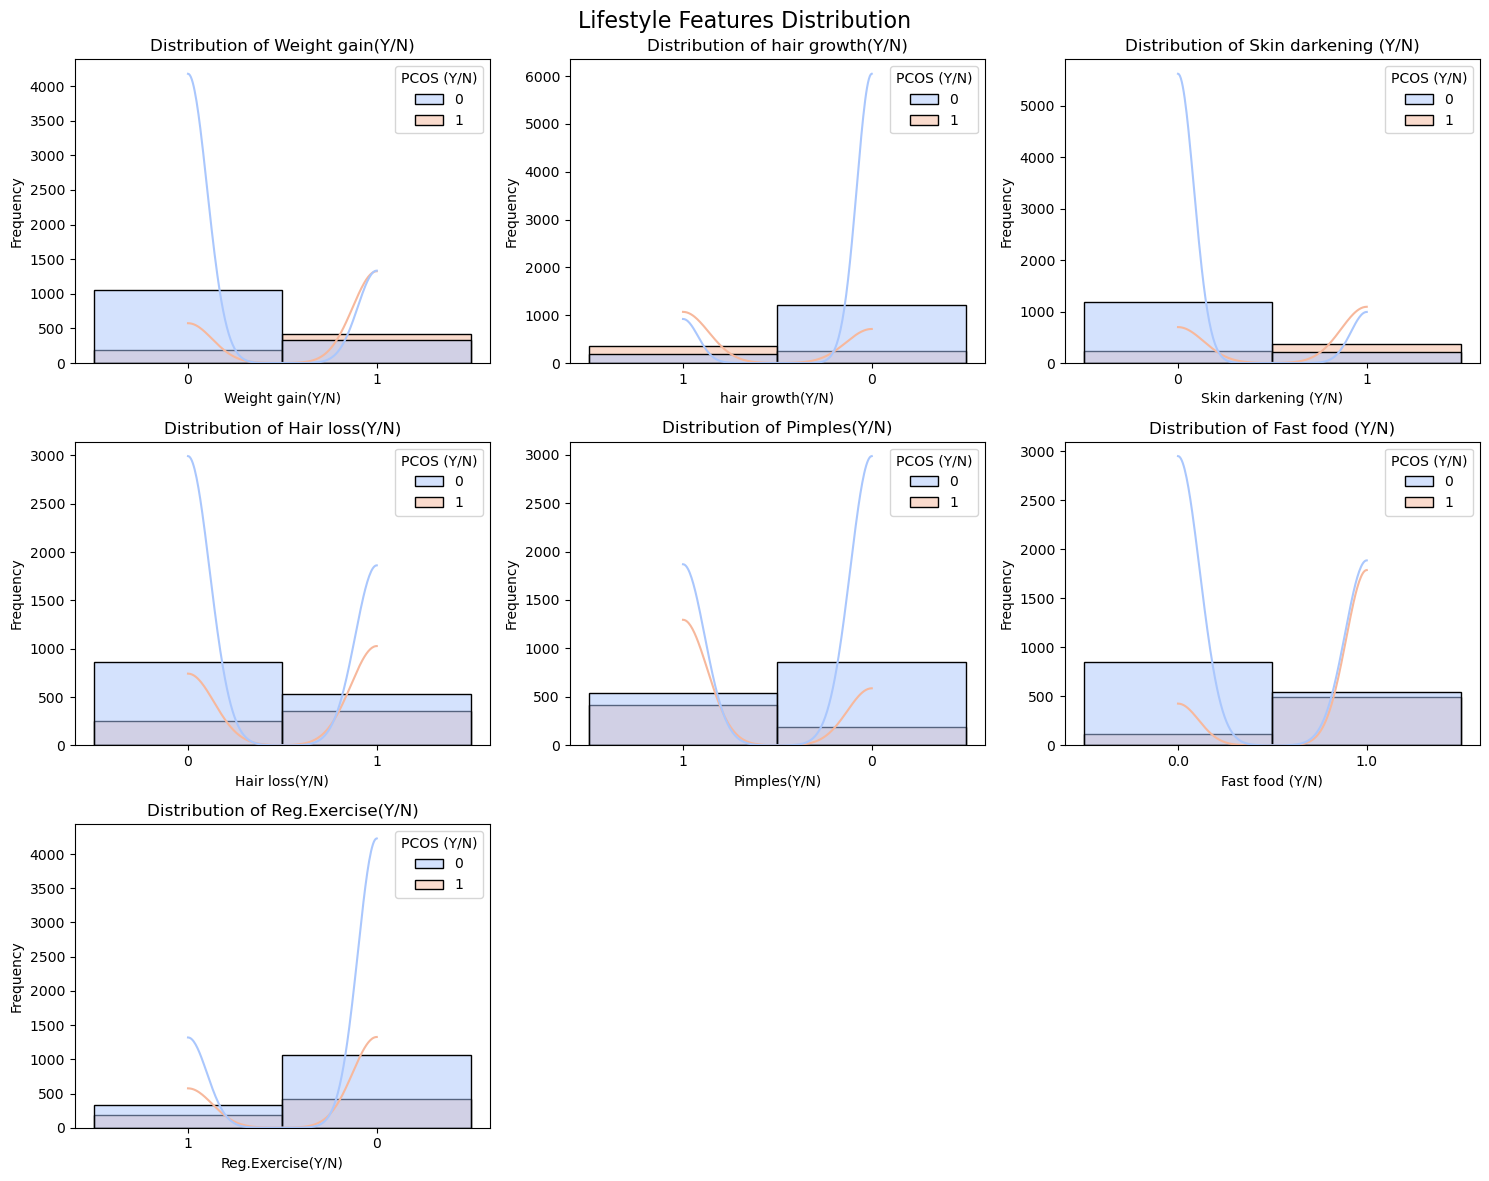

In [12]:
#visualize for lifestyle features
# Convert lifestyle features to string for hue differentiation
lifestyle_features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
                      'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
for col in lifestyle_features:
    df[col] = df[col].astype(str)

# Function to plot histograms
def plot_histograms(features, title):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.histplot(data=df, x=col, hue="PCOS (Y/N)", kde=True, palette="coolwarm", bins=20, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")

    # Hide extra subplots if features < 9
    for j in range(i + 1, 9):
        axes[j].set_visible(False)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot histogram
plot_histograms(lifestyle_features, "Lifestyle Features Distribution")

In [78]:
#generate summary statistics for each category, separated by PCOS status, for easy viewing
import pandas as pd

# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Function to get summary statistics for given features
def category_summary(features, category_name):
    # Check if all features exist in the dataframe
    valid_features = [col for col in features if col in df.columns]
    
    if not valid_features:
        print(f"\n⚠️ No valid columns found for {category_name}.")
        return None
    
    summary = df.groupby("PCOS (Y/N)")[valid_features].describe()
    
    print(f"\n🔹 Summary Statistics for {category_name}:")
    print(summary)
    
    return summary

# Get summary statistics for each category
hormonal_summary = category_summary(hormonal_features, "Hormonal Features")
metabolic_summary = category_summary(metabolic_features, "Metabolic Features")
lifestyle_summary = category_summary(lifestyle_features, "Lifestyle Features")



🔹 Summary Statistics for Hormonal Features:
           TSH (mIU/L)                                                     \
                 count      mean       std   min   25%   50%   75%    max   
PCOS (Y/N)                                                                  
0               1392.0  3.033797  3.447252  0.04  1.48  2.28  3.67  65.00   
1                608.0  2.923076  2.696355  0.05  1.63  2.29  3.52  22.59   

           PRL(ng/mL)                                                   \
                count       mean        std   min    25%    50%    75%   
PCOS (Y/N)                                                               
0              1392.0  24.586595  16.654857  0.40  14.86  21.10  29.11   
1               608.0  24.257484  13.606211  3.64  13.91  22.73  30.53   

                   FSH(mIU/mL)                                             \
               max       count       mean         std   min     25%   50%   
PCOS (Y/N)                                  

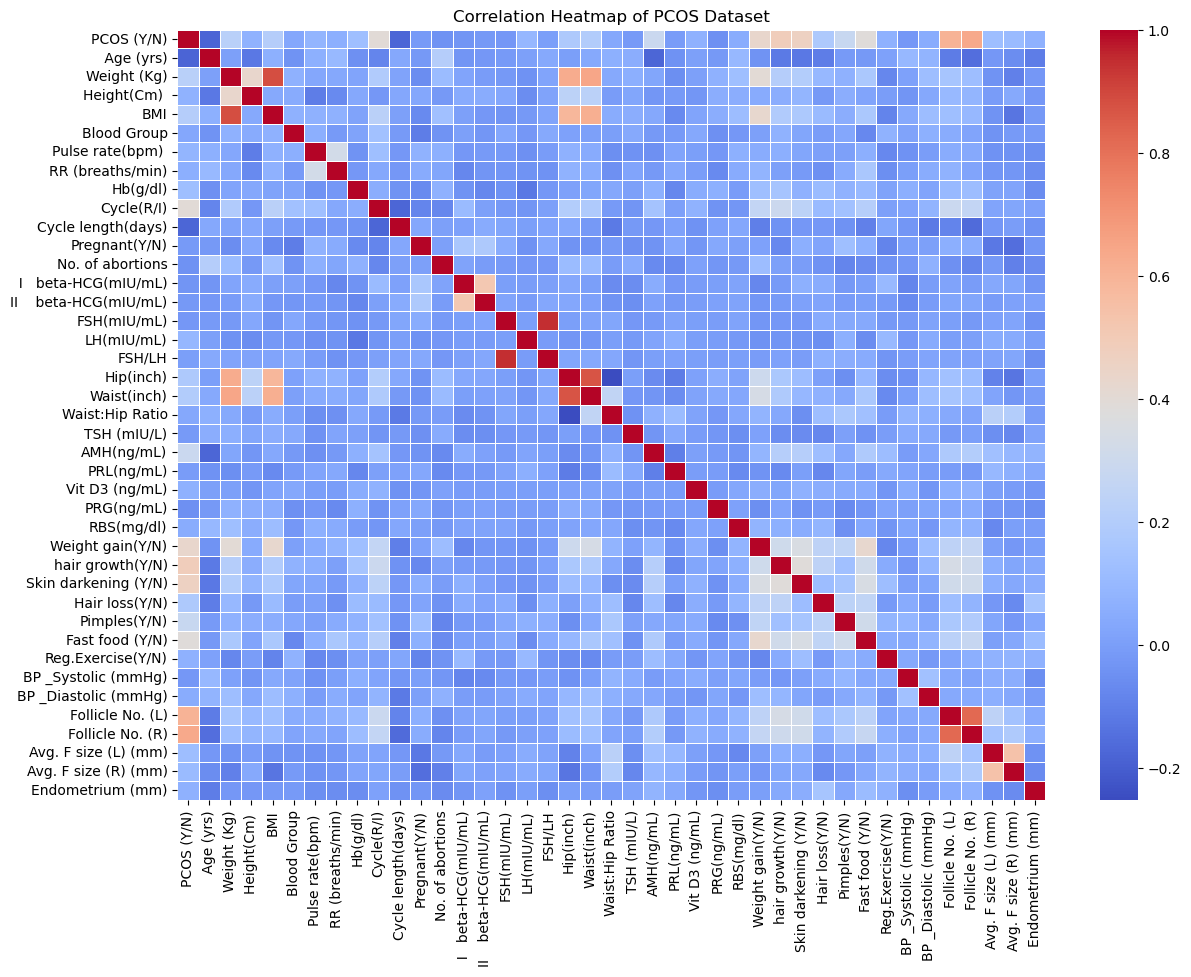

In [14]:
#CORRELATION ANALYSIS FOR FEATURE SELECTION
#Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of PCOS Dataset")
plt.show()

In [15]:
# Convert PCOS column values 
df['PCOS (Y/N)'] = df['PCOS (Y/N)'].replace({'Yes': 1, 'No': 2})
df = df.apply(pd.to_numeric, errors='coerce')
df.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.182594,0.221852,0.073486,0.204274,0.027818,0.082620,0.059307,0.126089,0.398291,...,0.278531,0.384289,0.068214,-0.026886,0.047691,0.599351,0.634140,0.122394,0.106656,0.066357
Age (yrs),-0.182594,1.000000,0.005860,-0.124313,0.064021,-0.037604,0.064100,0.104087,-0.047007,-0.081542,...,-0.015565,-0.022044,0.010639,0.097963,0.075672,-0.111921,-0.149379,-0.025788,-0.060749,-0.106730
Weight (Kg),0.221852,0.005860,1.000000,0.432091,0.885923,0.070714,0.030826,0.034704,0.021157,0.189644,...,0.069594,0.170393,-0.080130,0.008469,0.122614,0.156826,0.121492,-0.041159,-0.100076,-0.022870
Height(Cm),0.073486,-0.124313,0.432091,1.000000,0.037862,0.043592,-0.107243,-0.066852,0.031623,-0.025490,...,0.054923,0.019572,-0.004863,-0.036723,0.032232,0.100561,0.085004,-0.011049,0.041214,-0.022286
BMI,0.204274,0.064021,0.885923,0.037862,1.000000,0.066547,0.069783,0.067777,0.015087,0.223032,...,0.055549,0.169270,-0.090686,0.038572,0.118172,0.126573,0.095376,-0.037461,-0.131717,-0.020229
Blood Group,0.027818,-0.037604,0.070714,0.043592,0.066547,1.000000,0.059138,-0.016249,0.013895,0.138883,...,0.027450,-0.073599,0.071249,0.012144,0.064328,0.046906,0.021496,-0.038300,-0.015673,-0.014518
Pulse rate(bpm),0.082620,0.064100,0.030826,-0.107243,0.069783,0.059138,1.000000,0.323527,-0.040158,0.128165,...,0.002464,0.058309,-0.075932,-0.045281,-0.006933,0.048276,0.036926,-0.046497,-0.046107,-0.053362
RR (breaths/min),0.059307,0.104087,0.034704,-0.066852,0.067777,-0.016249,0.323527,1.000000,-0.025409,0.036406,...,0.045257,0.164512,-0.055513,0.001088,0.048719,0.073922,0.020330,-0.028983,-0.030853,-0.057668
Hb(g/dl),0.126089,-0.047007,0.021157,0.031623,0.015087,0.013895,-0.040158,-0.025409,1.000000,0.052699,...,0.072126,0.101361,0.013968,0.058246,0.018814,0.101695,0.117927,0.012874,0.019329,-0.056862
Cycle(R/I),0.398291,-0.081542,0.189644,-0.025490,0.223032,0.138883,0.128165,0.036406,0.052699,1.000000,...,0.136539,0.208758,0.005430,0.021400,0.077227,0.286910,0.258383,0.021261,0.023832,0.010308


In [16]:
# Ensure numeric columns are correctly formatted
numeric_cols = [' Age (yrs)', 'Weight (Kg)', 
 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 
 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 
 'Pregnant(Y/N)', 'No. of abortions', 'FSH(mIU/mL)', 
 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
 'TSH (mIU/L)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 
 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 
 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 
 'Avg. F size (R) (mm)', 'Endometrium (mm)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
# Convert non-numeric columns to numeric, forcing errors to NaN if conversion fails
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display only columns with missing values
print("Missing values in dataset:")
print(missing_values[missing_values > 0])

Missing values in dataset:
II    beta-HCG(mIU/mL)    5
AMH(ng/mL)                3
dtype: int64


In [18]:
# Drop rows where any of these columns have missing values
data.dropna(subset=['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], inplace=True)

In [19]:
print(data.isnull().sum())  # Should return all zeros

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [62]:
#PERFORM T_TEST
import scipy.stats as stats

# Drop the target column ('PCOS (Y/N)')
feature_columns = df2.drop(columns=['PCOS (Y/N)']).select_dtypes(include=['number']).columns

# Separate PCOS and Non-PCOS groups
pcos_data = df2[df2['PCOS (Y/N)'] == 1]
non_pcos_data = df2[df2['PCOS (Y/N)'] == 0]

# Perform T-test for each numerical feature
t_test_results = []
for feature in feature_columns:
    t_stat, p_value = stats.ttest_ind(pcos_data[feature], non_pcos_data[feature], nan_policy='omit')
    t_test_results.append({'Feature': feature, 'T-Statistic': t_stat, 'P-Value': p_value})

# Convert results to DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Sort results by P-Value (ascending)
t_test_df = t_test_df.sort_values(by='P-Value')

# Display results
print("T-Test Results for All Features:\n", t_test_df)

# Identify statistically significant features (p < 0.05)
significant_features = t_test_df[t_test_df['P-Value'] < 0.05]
print("\nSignificant Features (p < 0.05):\n", significant_features)

T-Test Results for All Features:
                    Feature  T-Statistic        P-Value
36        Follicle No. (R)    36.658968  1.892864e-225
35        Follicle No. (L)    33.467615  2.370656e-195
27        hair growth(Y/N)    24.625649  3.685464e-117
28    Skin darkening (Y/N)    23.565417  1.504260e-108
26        Weight gain(Y/N)    21.370350   2.012483e-91
8               Cycle(R/I)    19.409143   5.120082e-77
31         Fast food (Y/N)    18.606029   2.181777e-71
21              AMH(ng/mL)    13.538168   5.114864e-40
30            Pimples(Y/N)    12.963061   5.862196e-37
1              Weight (Kg)    10.169985   1.009697e-23
3                      BMI     9.327521   2.779118e-20
18             Waist(inch)     8.836891   2.110314e-18
0                Age (yrs)    -8.301322   1.871780e-16
29          Hair loss(Y/N)     8.291026   2.035272e-16
17               Hip(inch)     8.107276   8.928376e-16
9       Cycle length(days)    -8.027627   1.679036e-15
7                 Hb(g/dl)     

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['PCOS (Y/N)']) 
y = data['PCOS (Y/N)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for SVM & Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Convert class labels from {1,2} to {0,1}
y_train = y_train - 1
y_test = y_test - 1

In [22]:
# Define function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    # Ensure only numeric columns
    numeric_cols = df[columns].select_dtypes(include=np.number)
    
    Q1 = numeric_cols.quantile(0.25)  # 25th percentile (First Quartile)
    Q3 = numeric_cols.quantile(0.75)  # 75th percentile (Third Quartile)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_cleaned = df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]
    
    return df_cleaned

# List of feature categories
hormonal_features = ['FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 
                     'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)']  
metabolic_features = ['BMI', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']  
lifestyle_features = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
                      'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']  

# Apply outlier removal separately for each category
data_cleaned = remove_outliers_iqr(data, hormonal_features)
data_cleaned = remove_outliers_iqr(data_cleaned, metabolic_features)
data_cleaned = remove_outliers_iqr(data_cleaned, lifestyle_features)

# Print the shape before and after outlier removal
print(f"Original Data Shape: {data.shape}")
print(f"Cleaned Data Shape: {data_cleaned.shape}")

Original Data Shape: (1992, 41)
Cleaned Data Shape: (676, 41)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
#RECURSIVE FEATURE ELIMINATION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
selector_logreg = RFE(logreg_model, n_features_to_select=20)
selector_logreg.fit(X_train, y_train)

selected_features_logreg = X_train.columns[selector_logreg.support_]
print("Selected Features (LogReg):", selected_features_logreg)

C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Selected Features (LogReg): Index([' Age (yrs)', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)',
       'Cycle(R/I)', 'Cycle length(days)', 'Pregnant(Y/N)', 'LH(mIU/mL)',
       'Waist:Hip Ratio', 'PRG(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (R) (mm)'],
      dtype='object')


In [25]:
#RFE using RandomForest
# Initialize the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE
selector_rf = RFE(rf_model, n_features_to_select=20)
selector_rf.fit(X_train, y_train)

# Get selected feature names
selected_features_rf = X_train.columns[selector_rf.support_]
print("Selected Features (Random Forest):", selected_features_rf)

Selected Features (Random Forest): Index([' Age (yrs)', 'Weight (Kg)', 'Cycle(R/I)', 'Cycle length(days)',
       '  I   beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')


In [26]:
#RFE using XGBoost
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Apply RFE
selector_xgb = RFE(xgb_model, n_features_to_select=20)
selector_xgb.fit(X_train, y_train)

# Get selected feature names
selected_features_xgb = X_train.columns[selector_xgb.support_]
print("Selected Features (XGBoost):", selected_features_xgb)

C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\agbel\anaconda3\Lib\site-packages\

Selected Features (XGBoost): Index(['Weight (Kg)', 'Height(Cm) ', 'Pulse rate(bpm) ', 'Cycle(R/I)',
       'Cycle length(days)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)'],
      dtype='object')


C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [28]:
# Create an SVM model (Linear Kernel preferred for RFE)
svm = SVC(kernel="linear")

# Initialize RFE with the SVM model
rfe = RFE(estimator=svm, n_features_to_select=20)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index([' Age (yrs)', 'Blood Group', 'Hb(g/dl)', 'Cycle(R/I)', 'Pregnant(Y/N)',
       'LH(mIU/mL)', 'Waist:Hip Ratio', 'PRG(ng/mL)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [29]:
#let's compare the selected features
comparison_df = pd.DataFrame({
    "Logistic Regression": selected_features_logreg.tolist(),
    "Random Forest": selected_features_rf.tolist(),
    "XGBoost": selected_features_xgb.tolist(),
    "SVM": selected_features.tolist() 
})

print(comparison_df)


     Logistic Regression           Random Forest                 XGBoost  \
0              Age (yrs)               Age (yrs)             Weight (Kg)   
1       Pulse rate(bpm)              Weight (Kg)             Height(Cm)    
2       RR (breaths/min)              Cycle(R/I)        Pulse rate(bpm)    
3               Hb(g/dl)      Cycle length(days)              Cycle(R/I)   
4             Cycle(R/I)    I   beta-HCG(mIU/mL)      Cycle length(days)   
5     Cycle length(days)              LH(mIU/mL)    I   beta-HCG(mIU/mL)   
6          Pregnant(Y/N)                  FSH/LH  II    beta-HCG(mIU/mL)   
7             LH(mIU/mL)               Hip(inch)                  FSH/LH   
8        Waist:Hip Ratio             TSH (mIU/L)               Hip(inch)   
9             PRG(ng/mL)              AMH(ng/mL)             TSH (mIU/L)   
10      Weight gain(Y/N)              PRL(ng/mL)              AMH(ng/mL)   
11      hair growth(Y/N)          Vit D3 (ng/mL)        Weight gain(Y/N)   
12  Skin dar

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = data[X_train.columns]
pca = PCA(n_components=40) 
X_pca = pca.fit_transform(X_train_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
data_scaled = scaler.fit_transform(data[numerical_features])
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

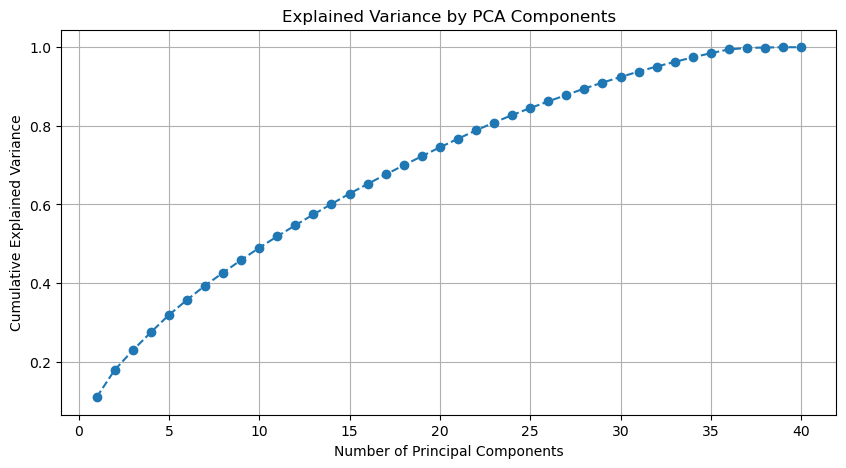

In [31]:
#visualize the variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [32]:
# Keep components that explain at least 95% of variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

# Apply PCA with selected components
pca = PCA(n_components=optimal_components)
data_pca = pca.fit_transform(data_scaled)

# Convert back to DataFrame
pca_columns = [f'PC{i+1}' for i in range(optimal_components)]
data_pca = pd.DataFrame(data_pca, columns=pca_columns)

print(data_pca.head())

Optimal number of components: 32
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.046520  0.993122 -0.246870  1.558665  0.207734 -0.122462 -0.684104   
1 -0.435239  1.263086  0.382935  0.584977 -0.400475 -0.695732  2.356620   
2 -0.959477  1.900940 -0.139013 -1.597776 -1.119242  2.295701 -0.701842   
3  0.273559  0.019454 -0.463413  0.561965  0.095801 -2.390891 -0.034392   
4 -2.314089  2.645556 -0.231858  1.712613  0.039954 -0.727101 -1.538862   

        PC8       PC9      PC10  ...      PC23      PC24      PC25      PC26  \
0 -0.482649  0.266696  0.433611  ... -0.780185  0.219044  1.674583  0.931065   
1  0.434828 -0.085998  0.539293  ...  0.120011  0.025285 -0.282391  1.110237   
2  0.483137  1.777354 -0.042674  ...  0.181143 -0.444065  0.611855  1.702695   
3  0.453167  2.586110 -1.862479  ... -0.162331  0.266573  0.282867  1.220490   
4  0.142069  0.099871 -0.719712  ...  0.875915  0.647055  0.473628  0.073700   

       PC27      PC28      PC29    

In [33]:
pca_loadings = pd.DataFrame(pca.components_.T, 
                            columns=[f'PC{i+1}' for i in range(optimal_components)], 
                            index=numerical_features)
print(pca_loadings)

                             PC1       PC2       PC3       PC4       PC5  \
 Age (yrs)             -0.041116  0.156862  0.004925 -0.109553 -0.223081   
Weight (Kg)             0.360576  0.277339  0.019287 -0.090921  0.107125   
Height(Cm)              0.124608  0.090410  0.071640 -0.047654  0.283999   
BMI                     0.342184  0.269893 -0.006570 -0.081687 -0.005737   
Blood Group             0.035581  0.001345  0.015439 -0.040662 -0.011730   
Pulse rate(bpm)         0.049670  0.042656 -0.049767  0.126206 -0.226791   
RR (breaths/min)        0.051118  0.036042 -0.075787  0.060477 -0.272371   
Hb(g/dl)                0.078001 -0.089727 -0.067608 -0.019216 -0.085912   
Cycle(R/I)              0.221975 -0.121455 -0.043033  0.065289 -0.011723   
Cycle length(days)     -0.059239  0.108579  0.054532  0.047637  0.120784   
Pregnant(Y/N)          -0.010629 -0.014255  0.088655  0.341811  0.031339   
No. of abortions        0.030958  0.174246 -0.040457 -0.037323 -0.094554   
  I   beta-H

In [34]:
print(data.columns)

Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


In [35]:
#MODEL BUILDING AND COMPARISON
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define feature sets
X_original = data 
X_pca = data_pca  

# Split data using same random state for consistency
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)  

In [36]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear', probability=True)
}

# Dictionary to store results
results = {"Original Features": {}, "PCA Features": {}, "RFE Features": {}}

#Model Performance on Original Features
print("\n Model Performance on Original Features ")
for name, model in models.items():
    model.fit(X_train_orig, y_train)
    y_pred = model.predict(X_test_orig)
    
    acc = accuracy_score(y_test, y_pred)
    results["Original Features"][name] = acc
    print(f"\n{name} Model Accuracy (Original Features): {acc:.4f}")
    print(classification_report(y_test, y_pred))

#Model Performance on PCA Features
print("\n Model Performance on PCA Features ")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    acc = accuracy_score(y_test, y_pred)
    results["PCA Features"][name] = acc
    print(f"\n{name} Model Accuracy (PCA Features): {acc:.4f}")
    print(classification_report(y_test, y_pred))

#Model Performance on RFE Features (SVM-Selected)
# Subset the features using RFE-selected columns
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

print("\n Model Performance on RFE Features (SVM-Selected) ")
for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    
    acc = accuracy_score(y_test, y_pred)
    results["RFE Features"][name] = acc
    print(f"\n{name} Model Accuracy (RFE Features): {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Print Final Comparison Table
import pandas as pd
results_df = pd.DataFrame(results)
print("\n Final Model Performance Comparison ")
print(results_df)


🔹 Model Performance on Original Features 🔹

Logistic Regression Model Accuracy (Original Features): 0.8271
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       274
           1       0.75      0.66      0.71       125

    accuracy                           0.83       399
   macro avg       0.80      0.78      0.79       399
weighted avg       0.82      0.83      0.82       399



C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Random Forest Model Accuracy (Original Features): 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       1.00      0.99      1.00       125

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy (Original Features): 0.9925
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       274
           1       0.99      0.98      0.99       125

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399


SVM Model Accuracy (Original Features): 0.9198
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       274
           1       0.89      0.85      0.87       125

    accuracy                           0.92       399
   macro avg       0.91      0.90      0.91       399
weighted avg       0.92      0.92      0.92       399


🔹 Model Performance on PCA Features 🔹

Logistic Regression Model Accuracy (PCA Features): 0.9098
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       274
           1       0.88      0.82      

C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy (PCA Features): 0.9799
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       274
           1       0.98      0.96      0.97       125

    accuracy                           0.98       399
   macro avg       0.98      0.97      0.98       399
weighted avg       0.98      0.98      0.98       399


SVM Model Accuracy (PCA Features): 0.9148
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       274
           1       0.91      0.81      0.86       125

    accuracy                           0.91       399
   macro avg       0.91      0.89      0.90       399
weighted avg       0.91      0.91      0.91       399


🔹 Model Performance on RFE Features (SVM-Selected) 🔹

Logistic Regression Model Accuracy (RFE Features): 0.6867
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       274
           1       0.00      0.00 

C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l


Random Forest Model Accuracy (RFE Features): 0.5739
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       274
           1       0.31      0.30      0.30       125

    accuracy                           0.57       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.57      0.57      0.57       399


XGBoost Model Accuracy (RFE Features): 0.5915
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       274
           1       0.30      0.23      0.26       125

    accuracy                           0.59       399
   macro avg       0.49      0.49      0.49       399
weighted avg       0.56      0.59      0.57       399



C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



SVM Model Accuracy (RFE Features): 0.6867
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       274
           1       0.00      0.00      0.00       125

    accuracy                           0.69       399
   macro avg       0.34      0.50      0.41       399
weighted avg       0.47      0.69      0.56       399


📊 Final Model Performance Comparison 📊
                     Original Features  PCA Features  RFE Features
Logistic Regression           0.827068      0.909774      0.686717
Random Forest                 0.997494      0.969925      0.573935
XGBoost                       0.992481      0.979950      0.591479
SVM                           0.919799      0.914787      0.686717


C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



🔹 Model Performance on Original Features 🔹

Logistic Regression Model Accuracy (Original Features): 0.8271
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       274
           1       0.75      0.66      0.71       125

    accuracy                           0.83       399
   macro avg       0.80      0.78      0.79       399
weighted avg       0.82      0.83      0.82       399



C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


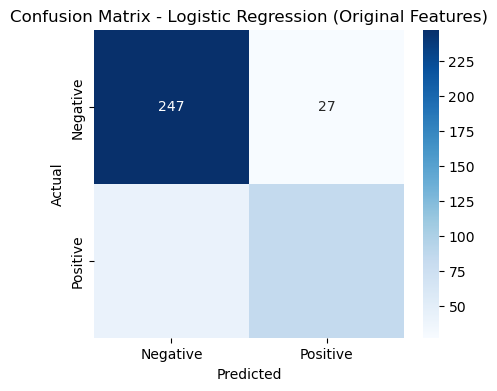

ROC-AUC Score (Original Features - Logistic Regression): 0.8996


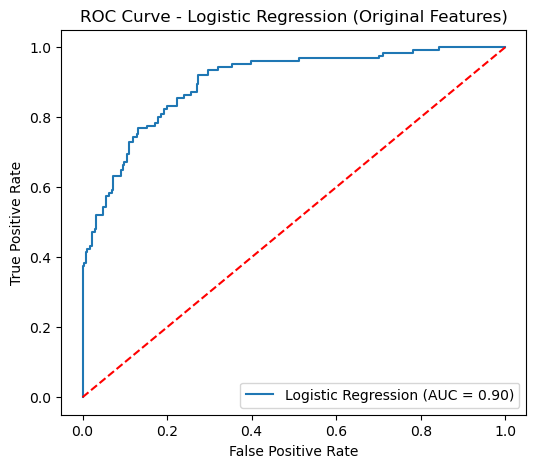


Random Forest Model Accuracy (Original Features): 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       274
           1       1.00      0.99      1.00       125

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



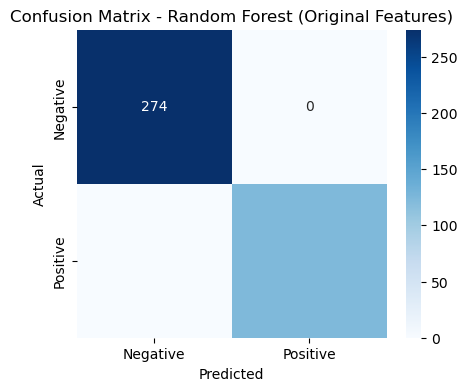

ROC-AUC Score (Original Features - Random Forest): 0.9998


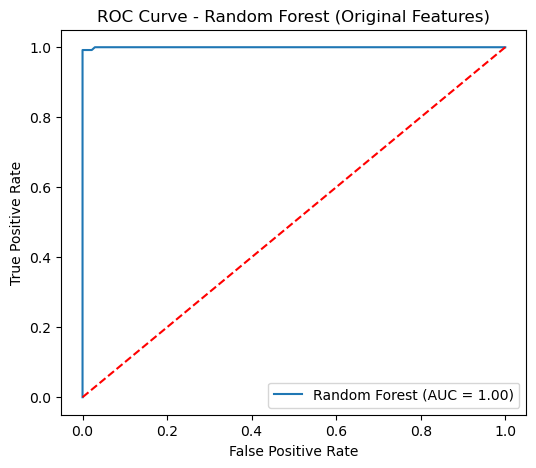

C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy (Original Features): 0.9925
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       274
           1       0.99      0.98      0.99       125

    accuracy                           0.99       399
   macro avg       0.99      0.99      0.99       399
weighted avg       0.99      0.99      0.99       399



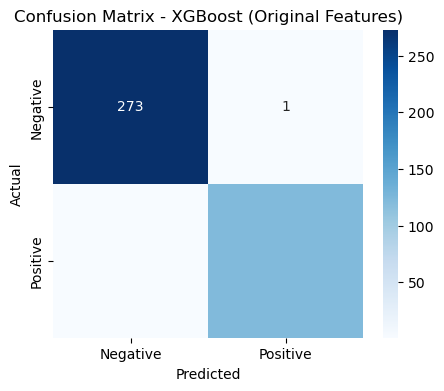

ROC-AUC Score (Original Features - XGBoost): 0.9999


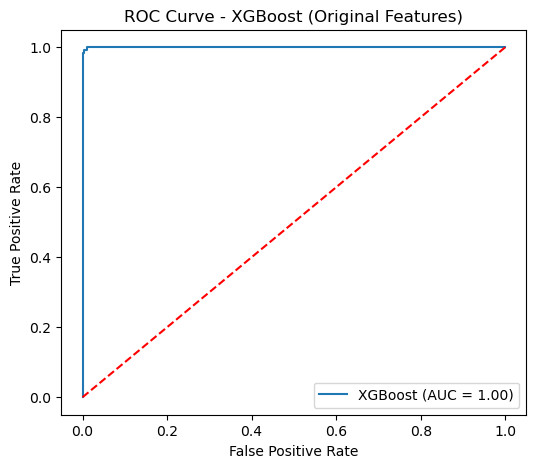


SVM Model Accuracy (Original Features): 0.9198
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       274
           1       0.89      0.85      0.87       125

    accuracy                           0.92       399
   macro avg       0.91      0.90      0.91       399
weighted avg       0.92      0.92      0.92       399



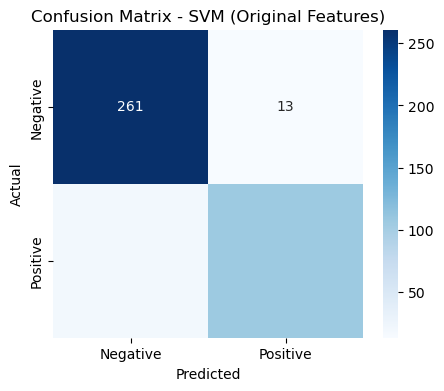

ROC-AUC Score (Original Features - SVM): 0.9524


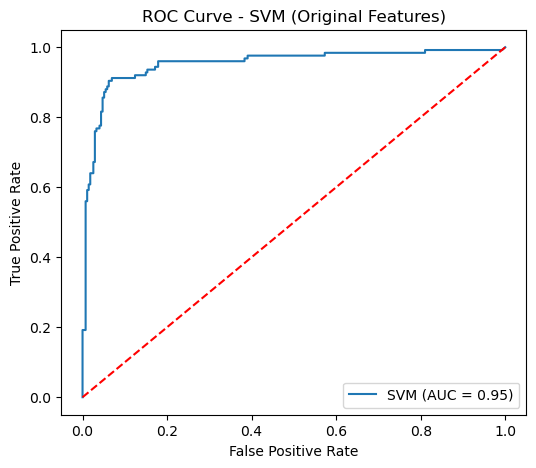


🔹 Model Performance on PCA Features 🔹

Logistic Regression Model Accuracy (PCA Features): 0.9098
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       274
           1       0.88      0.82      0.85       125

    accuracy                           0.91       399
   macro avg       0.90      0.89      0.89       399
weighted avg       0.91      0.91      0.91       399



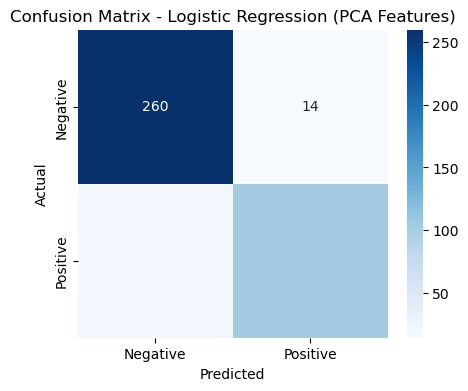

ROC-AUC Score (PCA Features - Logistic Regression): 0.9674


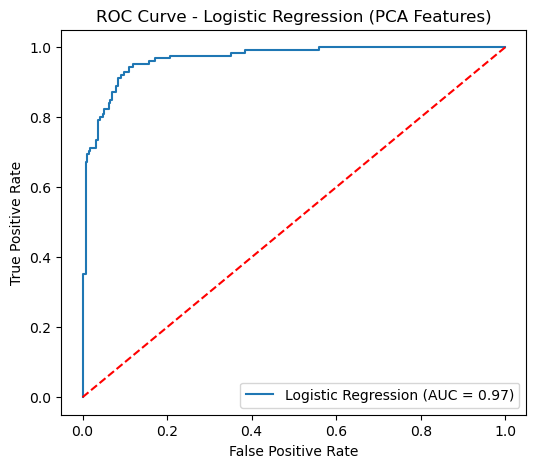


Random Forest Model Accuracy (PCA Features): 0.9699
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       274
           1       0.99      0.91      0.95       125

    accuracy                           0.97       399
   macro avg       0.98      0.95      0.96       399
weighted avg       0.97      0.97      0.97       399



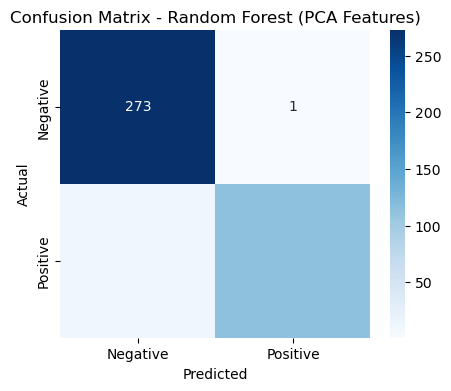

ROC-AUC Score (PCA Features - Random Forest): 0.9992


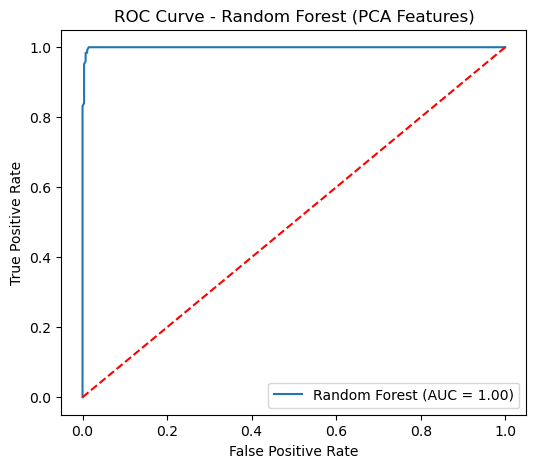

C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy (PCA Features): 0.9799
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       274
           1       0.98      0.96      0.97       125

    accuracy                           0.98       399
   macro avg       0.98      0.97      0.98       399
weighted avg       0.98      0.98      0.98       399



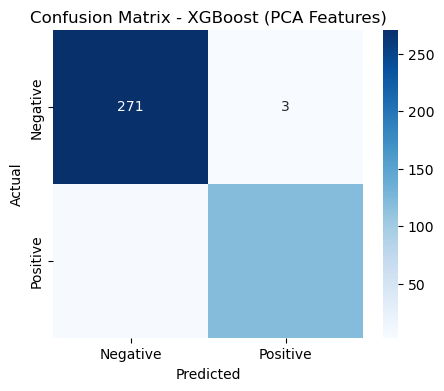

ROC-AUC Score (PCA Features - XGBoost): 0.9985


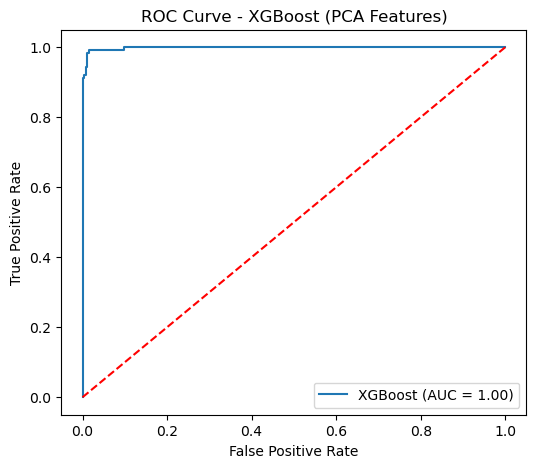


SVM Model Accuracy (PCA Features): 0.9148
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       274
           1       0.91      0.81      0.86       125

    accuracy                           0.91       399
   macro avg       0.91      0.89      0.90       399
weighted avg       0.91      0.91      0.91       399



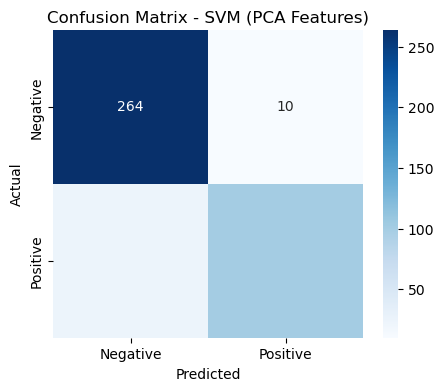

ROC-AUC Score (PCA Features - SVM): 0.9629


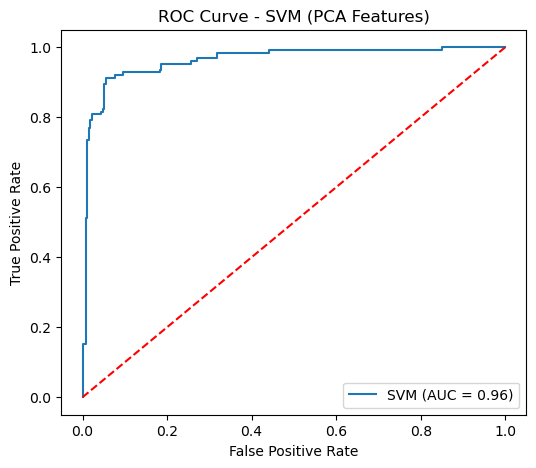


🔹 Model Performance on RFE Features 🔹

Logistic Regression Model Accuracy (RFE Features): 0.6867
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       274
           1       0.00      0.00      0.00       125

    accuracy                           0.69       399
   macro avg       0.34      0.50      0.41       399
weighted avg       0.47      0.69      0.56       399



C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

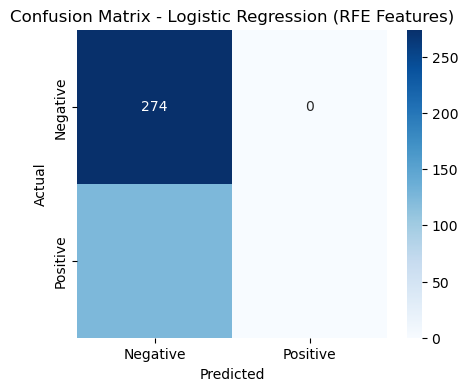

ROC-AUC Score (RFE Features - Logistic Regression): 0.4916


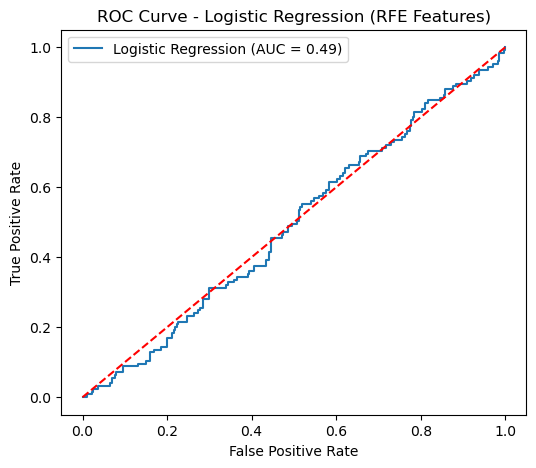


Random Forest Model Accuracy (RFE Features): 0.5739
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       274
           1       0.31      0.30      0.30       125

    accuracy                           0.57       399
   macro avg       0.50      0.50      0.50       399
weighted avg       0.57      0.57      0.57       399



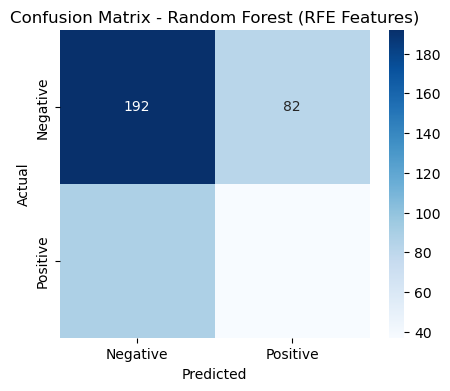

ROC-AUC Score (RFE Features - Random Forest): 0.4778


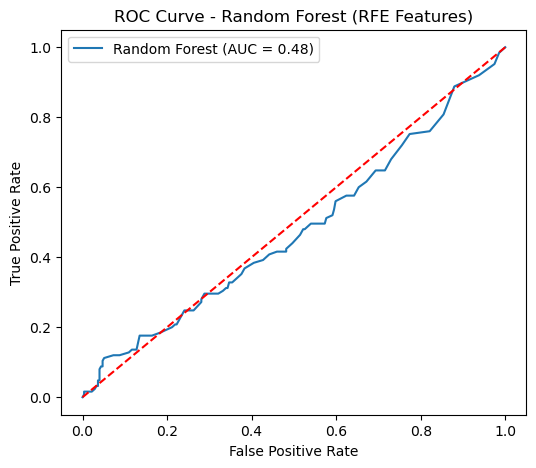

C:\Users\agbel\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Accuracy (RFE Features): 0.5915
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       274
           1       0.30      0.23      0.26       125

    accuracy                           0.59       399
   macro avg       0.49      0.49      0.49       399
weighted avg       0.56      0.59      0.57       399



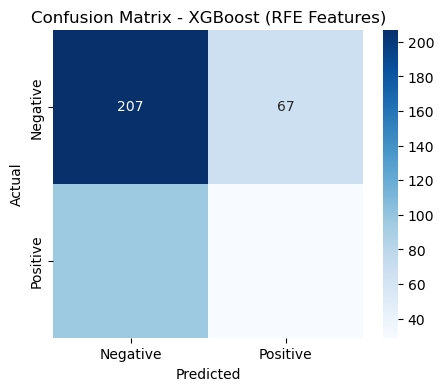

ROC-AUC Score (RFE Features - XGBoost): 0.4948


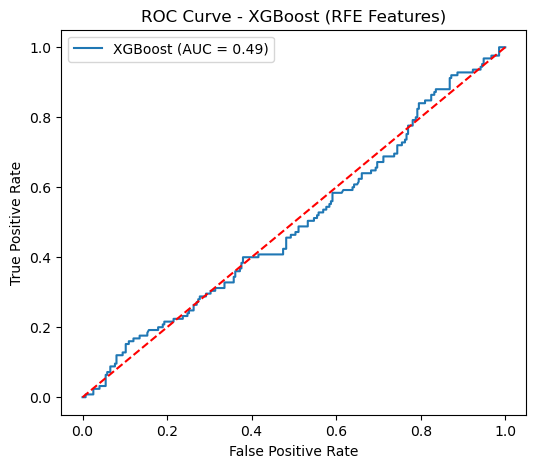


SVM Model Accuracy (RFE Features): 0.6867
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       274
           1       0.00      0.00      0.00       125

    accuracy                           0.69       399
   macro avg       0.34      0.50      0.41       399
weighted avg       0.47      0.69      0.56       399



C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\agbel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


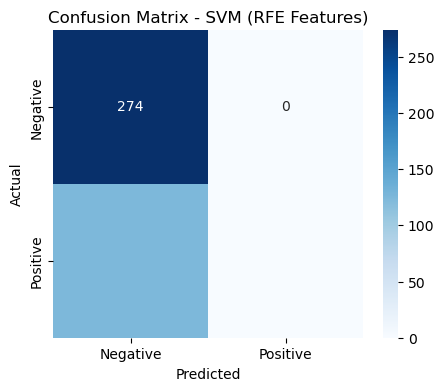

ROC-AUC Score (RFE Features - SVM): 0.4877


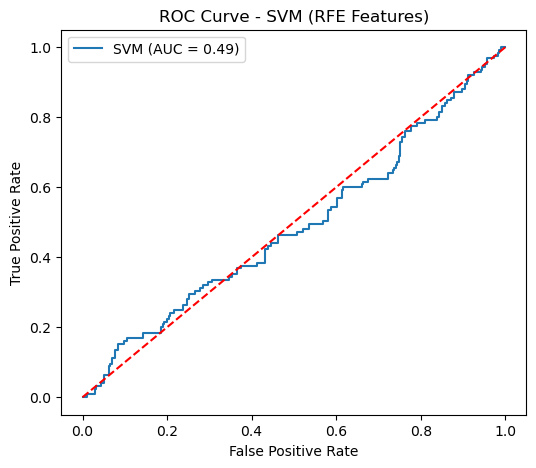


📊 Final Model Performance Comparison 📊
                     Original Features  PCA Features  RFE Features
Logistic Regression           0.827068      0.909774      0.686717
Random Forest                 0.997494      0.969925      0.573935
XGBoost                       0.992481      0.979950      0.591479
SVM                           0.919799      0.914787      0.686717


In [37]:
#MODEL BUILDING AND EVALUATION
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(kernel='linear', probability=True)  # Use probability=True for ROC-AUC evaluation
}

# Dictionary to store results
results = {"Original Features": {}, "PCA Features": {}, "RFE Features": {}}

# Function to train and evaluate models
def train_evaluate_models(X_train, X_test, feature_type):
    print(f"\n Model Performance on {feature_type} ")
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        results[feature_type][name] = acc
        
        # Print results
        print(f"\n{name} Model Accuracy ({feature_type}): {acc:.4f}")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - {name} ({feature_type})")
        plt.show()

        # ROC-AUC Score & Curve (if applicable)
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            print(f"ROC-AUC Score ({feature_type} - {name}): {roc_auc:.4f}")

            # Plot ROC Curve
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(6, 5))
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
            plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve - {name} ({feature_type})")
            plt.legend()
            plt.show()

# Train and evaluate models on different feature sets
train_evaluate_models(X_train_orig, X_test_orig, "Original Features")
train_evaluate_models(X_train_pca, X_test_pca, "PCA Features")

# Train on RFE-Selected Features (SVM-Based)
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
train_evaluate_models(X_train_rfe, X_test_rfe, "RFE Features")

# Print Final Model Comparison Table
results_df = pd.DataFrame(results)
print("\n Final Model Performance Comparison ")
print(results_df)


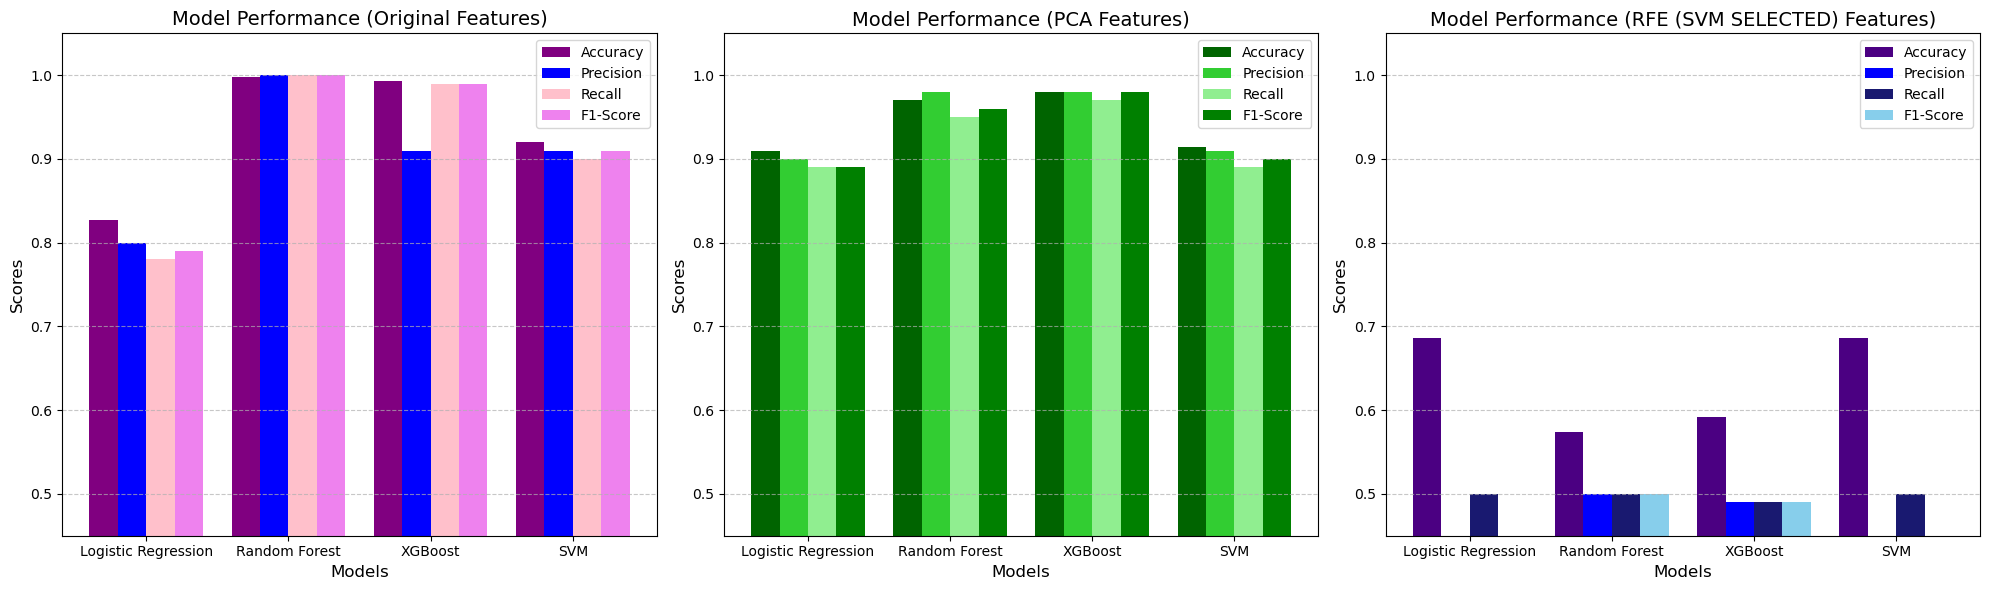

In [52]:
# Define models
models = ["Logistic Regression", "Random Forest", "XGBoost", "SVM"]

# Performance metrics (Original Features)
accuracy_orig = [0.8271, 0.9975, 0.9925, 0.9198]
precision_orig = [0.80, 1.00, 0.91, 0.91]
recall_orig = [0.78, 1.00, 0.99, 0.90]
f1_score_orig = [0.79, 1.00, 0.99, 0.91]

# Performance metrics (PCA Features)
accuracy_pca = [0.9098, 0.9699, 0.9799, 0.9148]
precision_pca = [0.90, 0.98, 0.98, 0.91]
recall_pca = [0.89, 0.95, 0.97, 0.89]
f1_score_pca = [0.89, 0.96, 0.98, 0.90]

# Performance metrics (RFE Features (SVM SELECTED))
accuracy_rfe = [0.6867, 0.5739, 0.5915, 0.6867]
precision_rfe = [0.34, 0.50, 0.49, 0.34]
recall_rfe = [0.50, 0.50, 0.49, 0.50]
f1_score_rfe = [0.41, 0.50, 0.49, 0.41]

# Bar width
bar_width = 0.2
x = np.arange(len(models))

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# --- Plot for Original Features ---
axes[0].bar(x - 1.5*bar_width, accuracy_orig, width=bar_width, label='Accuracy', color='purple')
axes[0].bar(x - 0.5*bar_width, precision_orig, width=bar_width, label='Precision', color='blue')
axes[0].bar(x + 0.5*bar_width, recall_orig, width=bar_width, label='Recall', color='pink')
axes[0].bar(x + 1.5*bar_width, f1_score_orig, width=bar_width, label='F1-Score', color='violet')

axes[0].set_title('Model Performance (Original Features)', fontsize=14)
axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Scores', fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_ylim(0.45, 1.05)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot for PCA Features ---
axes[1].bar(x - 1.5*bar_width, accuracy_pca, width=bar_width, label='Accuracy', color='darkgreen')
axes[1].bar(x - 0.5*bar_width, precision_pca, width=bar_width, label='Precision', color='limegreen')
axes[1].bar(x + 0.5*bar_width, recall_pca, width=bar_width, label='Recall', color='lightgreen')
axes[1].bar(x + 1.5*bar_width, f1_score_pca, width=bar_width, label='F1-Score', color='green')

axes[1].set_title('Model Performance (PCA Features)', fontsize=14)
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('Scores', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_ylim(0.45, 1.05)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot for RFE (SVM SELECTED) Features ---
axes[2].bar(x - 1.5*bar_width, accuracy_rfe, width=bar_width, label='Accuracy', color='indigo')
axes[2].bar(x - 0.5*bar_width, precision_rfe, width=bar_width, label='Precision', color='blue')
axes[2].bar(x + 0.5*bar_width, recall_rfe, width=bar_width, label='Recall', color='midnightblue')
axes[2].bar(x + 1.5*bar_width, f1_score_rfe, width=bar_width, label='F1-Score', color='skyblue')

axes[2].set_title('Model Performance (RFE (SVM SELECTED) Features)', fontsize=14)
axes[2].set_xlabel('Models', fontsize=12)
axes[2].set_ylabel('Scores', fontsize=12)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models)
axes[2].set_ylim(0.45, 1.05)
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


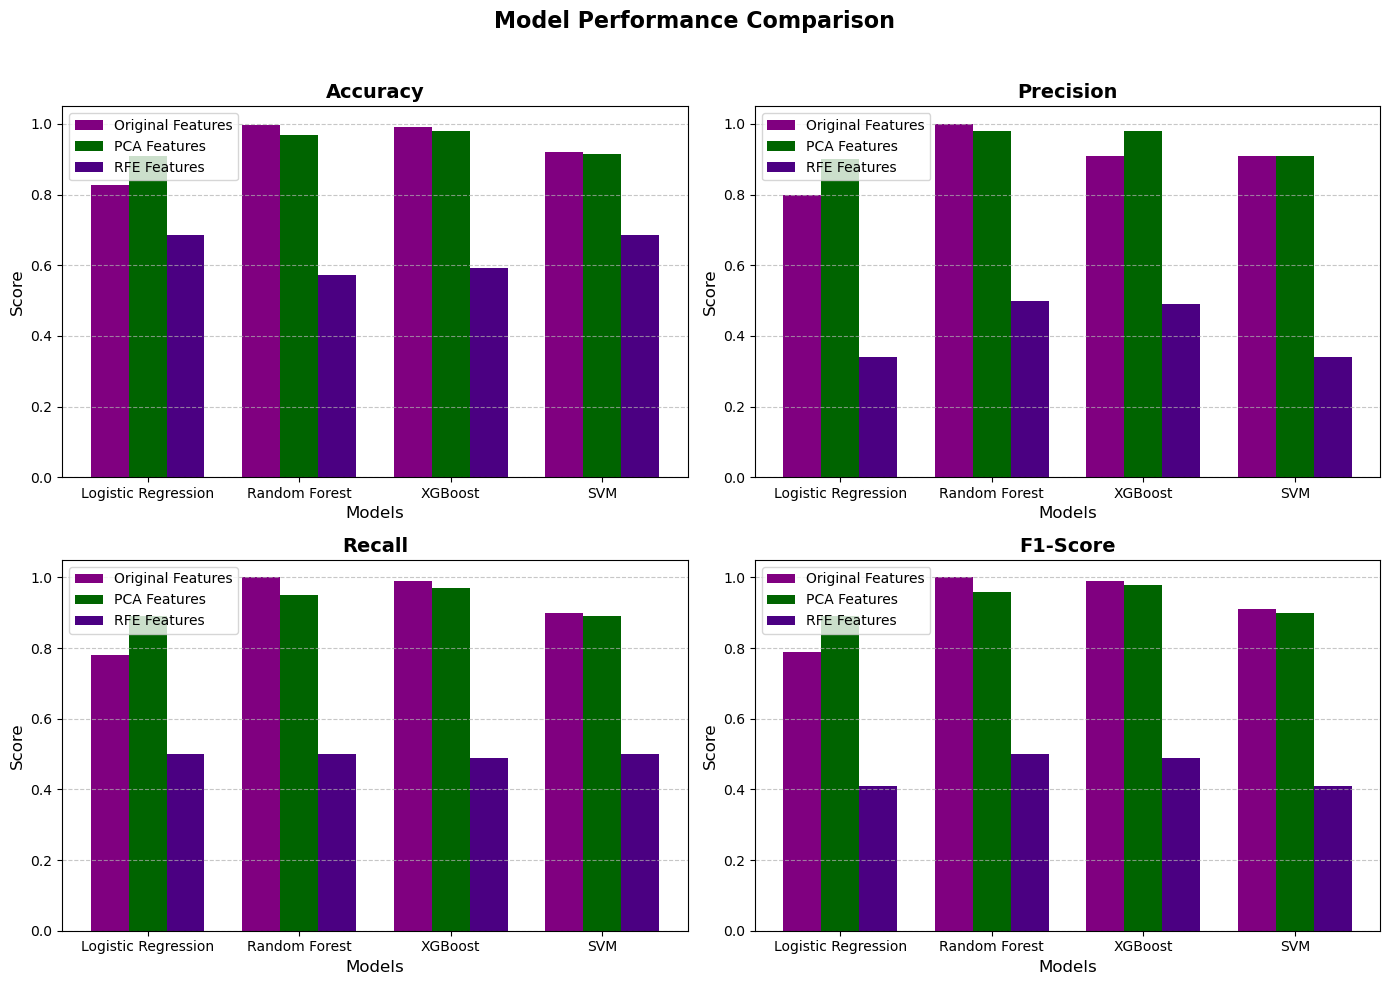

In [44]:
#ALTERNATIVE VISUALS
# Define models
models = ["Logistic Regression", "Random Forest", "XGBoost", "SVM"]

# Performance metrics (Original Features)
accuracy_orig = [0.8271, 0.9975, 0.9925, 0.9198]
precision_orig = [0.80, 1.00, 0.91, 0.91]
recall_orig = [0.78, 1.00, 0.99, 0.90]
f1_score_orig = [0.79, 1.00, 0.99, 0.91]

# Performance metrics (PCA Features)
accuracy_pca = [0.9098, 0.9699, 0.9799, 0.9148]
precision_pca = [0.90, 0.98, 0.98, 0.91]
recall_pca = [0.89, 0.95, 0.97, 0.89]
f1_score_pca = [0.89, 0.96, 0.98, 0.90]

# Performance metrics (RFE Features)
accuracy_rfe = [0.6867, 0.5739, 0.5915, 0.6867]
precision_rfe = [0.34, 0.50, 0.49, 0.34]
recall_rfe = [0.50, 0.50, 0.49, 0.50]
f1_score_rfe = [0.41, 0.50, 0.49, 0.41]

# Bar width
bar_width = 0.25
x = np.arange(len(models))

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Performance Comparison", fontsize=16, fontweight='bold')

# Define metric labels and corresponding data
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
data = [
    (accuracy_orig, accuracy_pca, accuracy_rfe),
    (precision_orig, precision_pca, precision_rfe),
    (recall_orig, recall_pca, recall_rfe),
    (f1_score_orig, f1_score_pca, f1_score_rfe),
]

colors = ['purple', 'darkgreen', 'indigo']
labels = ["Original Features", "PCA Features", "RFE Features"]

# Loop through subplots
for i, ax in enumerate(axes.flat):
    ax.bar(x - bar_width, data[i][0], width=bar_width, label=labels[0], color=colors[0])
    ax.bar(x, data[i][1], width=bar_width, label=labels[1], color=colors[1])
    ax.bar(x + bar_width, data[i][2], width=bar_width, label=labels[2], color=colors[2])

    ax.set_title(metrics[i], fontsize=14, fontweight='bold')
    ax.set_xlabel("Models", fontsize=12)
    ax.set_ylabel("Score", fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1.05)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [45]:
#clarification on the performance of the models using the original features
#calling the copy made earlier 'df2'
df2.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [47]:
label_encoder = LabelEncoder()
categorical_cols = df2.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df2[col] = label_encoder.fit_transform(df2[col])

In [48]:
# Split dataset into features (X) and target (y)
X = df2.drop('PCOS (Y/N)', axis=1)  
y = df2['PCOS (Y/N)']  

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Standardize the features for models that require scaling (like SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# 2. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# 3. XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# 4. SVM Classifier
svm = SVC(kernel='linear')  # You can try 'rbf' or 'poly' as well
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Logistic Regression Accuracy: 0.915
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       263
           1       0.93      0.82      0.87       137

    accuracy                           0.92       400
   macro avg       0.92      0.89      0.90       400
weighted avg       0.92      0.92      0.91       400

Random Forest Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       0.99      0.99      0.99       137

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400

XGBoost Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       263
           1       0.99      0.99      0.99       137

    accuracy        

The best model is Random Forest with accuracy: 0.995
Feature Importances for Best Model:
                   Feature  Importance
36        Follicle No. (R)    0.204320
35        Follicle No. (L)    0.115747
27        hair growth(Y/N)    0.061118
28    Skin darkening (Y/N)    0.055645
26        Weight gain(Y/N)    0.050370
21              AMH(ng/mL)    0.039039
8               Cycle(R/I)    0.027572
9       Cycle length(days)    0.027518
16                  FSH/LH    0.024735
17               Hip(inch)    0.024018
31         Fast food (Y/N)    0.023109
15              LH(mIU/mL)    0.021545
0                Age (yrs)    0.021405
20             TSH (mIU/L)    0.019218
12    I   beta-HCG(mIU/mL)    0.017856
38    Avg. F size (R) (mm)    0.017111
2              Height(Cm)     0.015874
14             FSH(mIU/mL)    0.015435
18             Waist(inch)    0.015157
22              PRL(ng/mL)    0.014739
1              Weight (Kg)    0.014734
23          Vit D3 (ng/mL)    0.014567
7             

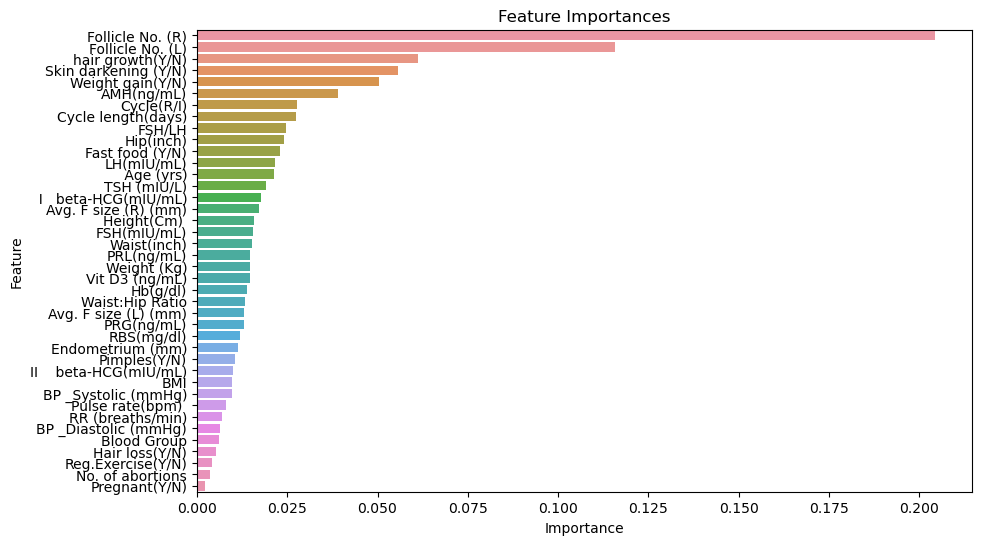

In [51]:
# Evaluate the best model based on accuracy 
best_model = None
best_accuracy = 0
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if name != "Random Forest" else X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"The best model is {best_model_name} with accuracy: {best_accuracy}")

# 5. Feature Importance (for Random Forest and XGBoost models)
if best_model_name in ["Random Forest", "XGBoost"]:
    feature_importances = best_model.feature_importances_
    feature_names = X.columns
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importances for Best Model:")
    print(feature_importances_df)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances_df)
    plt.title("Feature Importances")
    plt.show()

In [ ]:
#the most important features contributing to the performance of the RandomForest Model using the original features in the dataset are as shown in the plot above.

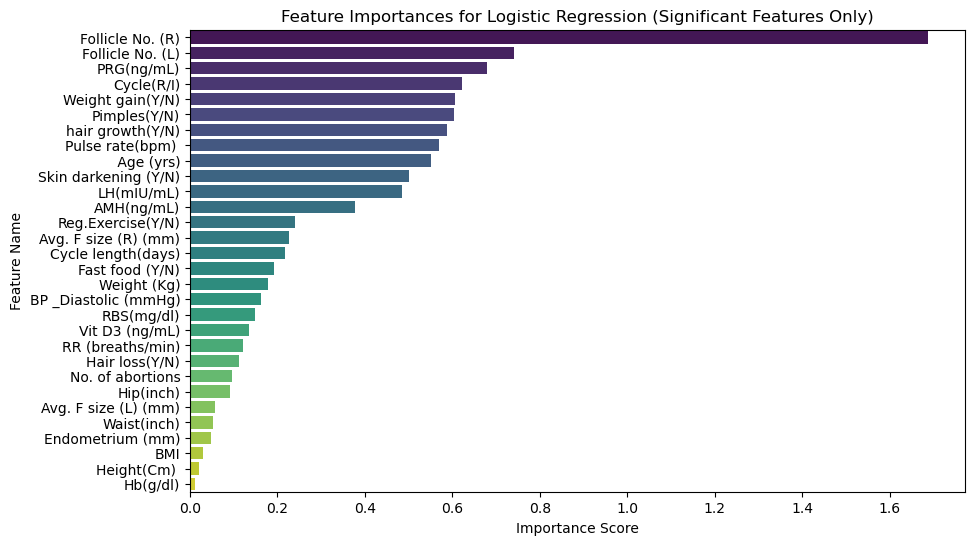

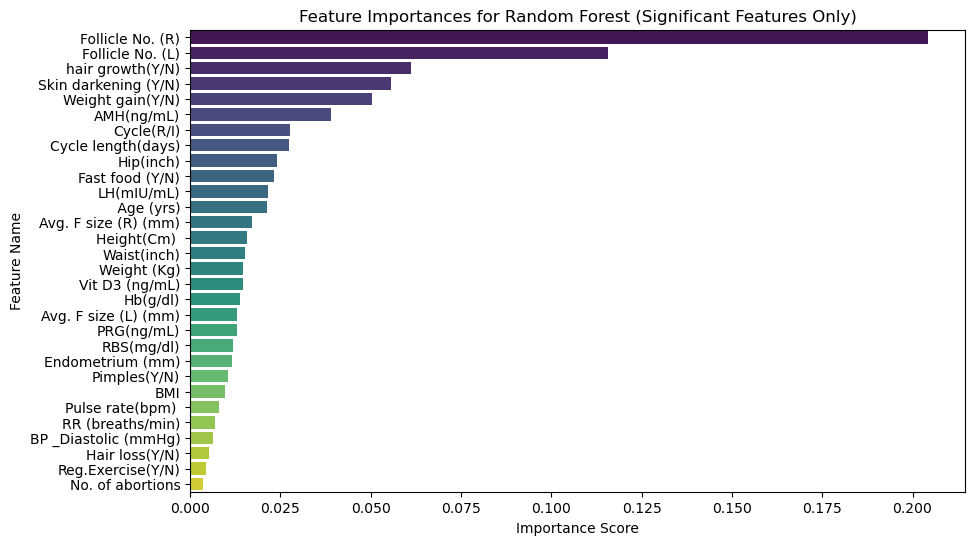

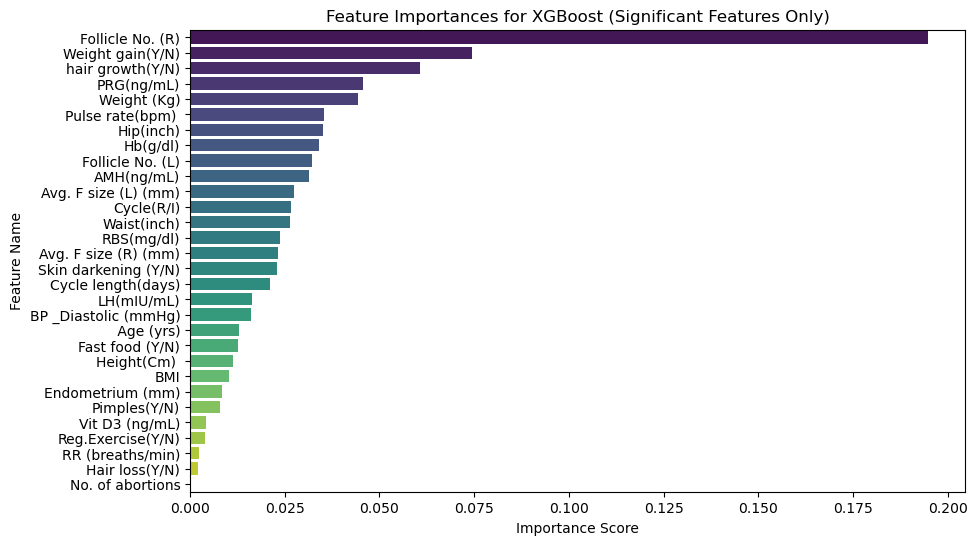

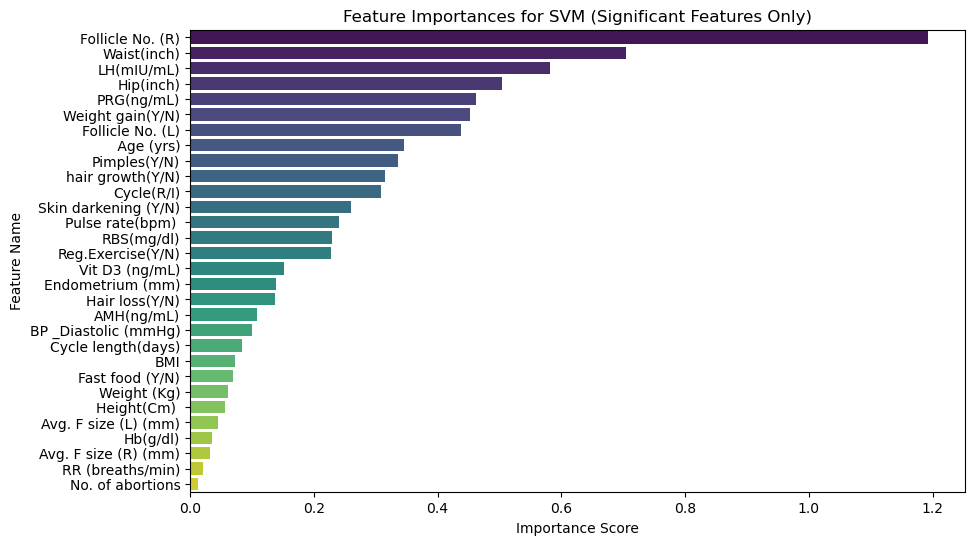

In [64]:
#VISUALIZATION OF FEATURE IMPORTANCE FOR THE DIFFERENT MODELS
from sklearn.inspection import permutation_importance

# Dictionary to store models
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm
}

# Ensure t_test_df is already calculated
significant_features = set(t_test_df[t_test_df['P-Value'] < 0.05]['Feature'])

# Loop through each model to calculate feature importance
for name, model in models.items():
    if name in ["Random Forest", "XGBoost"]:
        # Get feature importances directly
        feature_importances = model.feature_importances_
    elif name in ["Logistic Regression", "SVM"]:
        # Get absolute values of coefficients (since importance can be negative)
        feature_importances = np.abs(model.coef_[0])
    
    # Create DataFrame
    feature_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Filter for only significant features
    feature_importances_df = feature_importances_df[feature_importances_df['Feature'].isin(significant_features)]
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances_df, palette="viridis")
    plt.title(f"Feature Importances for {name} (Significant Features Only)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.show()


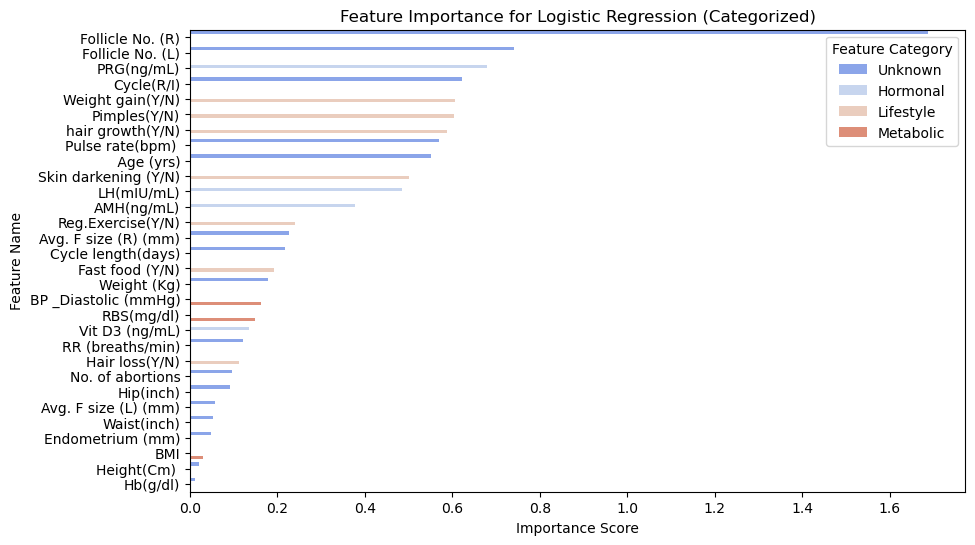

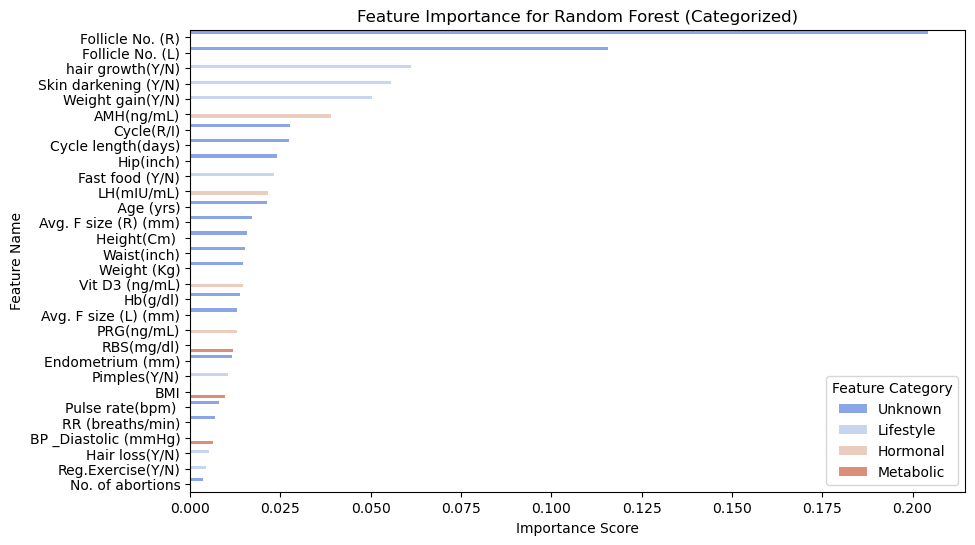

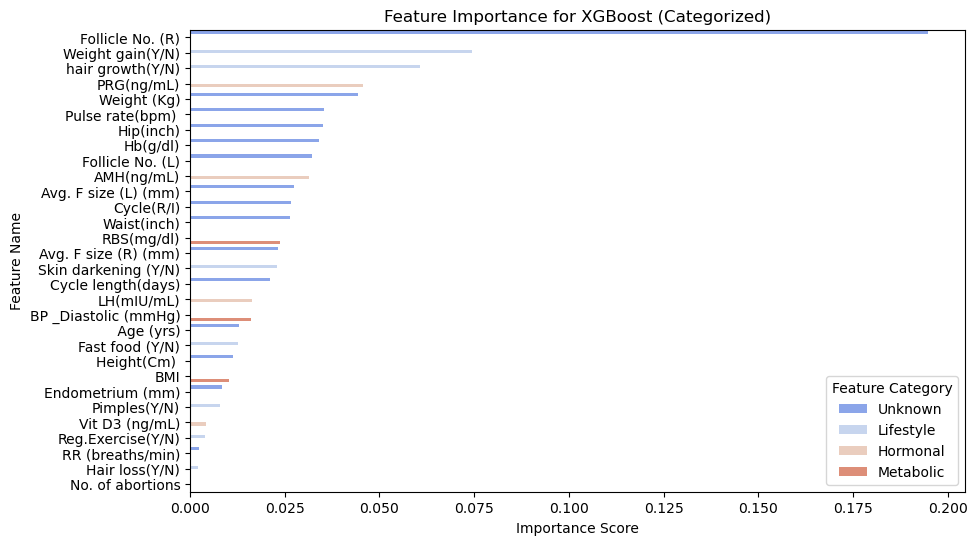

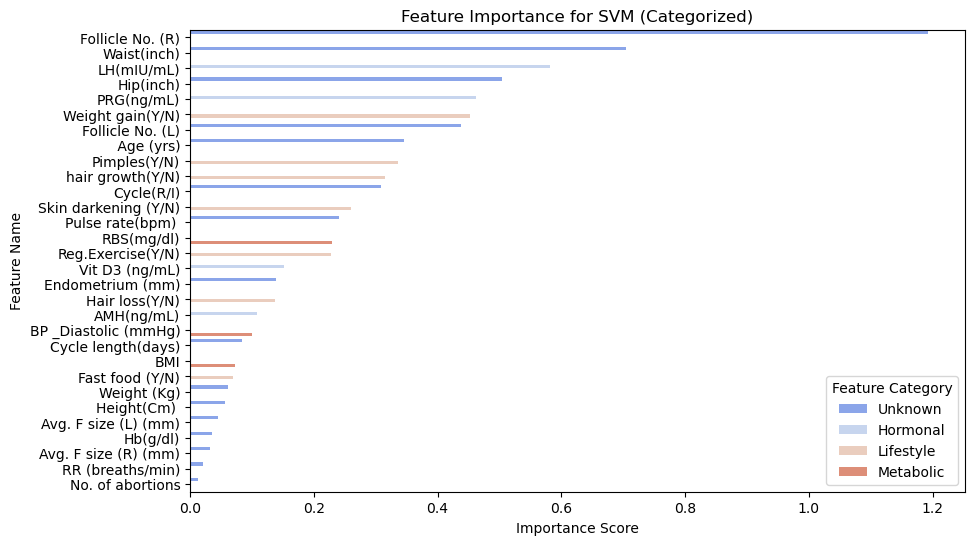

Feature Category Contributions per Model:

Logistic Regression:
  Unknown: 16 features
  Lifestyle: 7 features
  Hormonal: 4 features
  Metabolic: 3 features

Random Forest:
  Unknown: 16 features
  Lifestyle: 7 features
  Hormonal: 4 features
  Metabolic: 3 features

XGBoost:
  Unknown: 16 features
  Lifestyle: 7 features
  Hormonal: 4 features
  Metabolic: 3 features

SVM:
  Unknown: 16 features
  Lifestyle: 7 features
  Hormonal: 4 features
  Metabolic: 3 features


In [65]:
# Define feature categories
hormonal_features = {'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 
                     'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)'} 
metabolic_features = {'BMI', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'}  
lifestyle_features = {'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
                      'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)'}  

# Dictionary to store feature category counts for each model
category_contributions = {}

# Loop through each model
for name, model in models.items():
    if name in ["Random Forest", "XGBoost"]:
        feature_importances = model.feature_importances_
    elif name in ["Logistic Regression", "SVM"]:
        feature_importances = np.abs(model.coef_[0])
    
    # Create DataFrame
    feature_importances_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    })

    # Filter for significant features
    feature_importances_df = feature_importances_df[feature_importances_df['Feature'].isin(significant_features)]
    
    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Categorize Features
    feature_importances_df["Category"] = feature_importances_df["Feature"].apply(
        lambda x: "Hormonal" if x in hormonal_features else
                  "Metabolic" if x in metabolic_features else
                  "Lifestyle" if x in lifestyle_features else "Unknown"
    )

    # Count category contributions
    category_counts = feature_importances_df["Category"].value_counts().to_dict()
    category_contributions[name] = category_counts

    # Plot feature importances with categories
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", hue="Category", data=feature_importances_df, palette="coolwarm")
    plt.title(f"Feature Importance for {name} (Categorized)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.legend(title="Feature Category")
    plt.show()

# Print category-wise contributions per model
print("Feature Category Contributions per Model:")
for model, counts in category_contributions.items():
    print(f"\n{model}:")
    for category, count in counts.items():
        print(f"  {category}: {count} features")

In [1]:
import os
print(os.getcwd())  # Get current working directory

C:\Users\agbel
